# Load The Model:

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('model_with_drop')

# Take a picture of the Written Number:

In [ ]:
import cv2 as cv
import sys

cam = cv.VideoCapture(1)
cam.set(3,640)
cam.set(4,480)
cv.namedWindow("test")

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed !")
        break
    cv.imshow("test",frame)
    k = cv.waitKey(1)
    if k%256 == 27:
        #esc
        print("Closing")
        break
    elif k%256 == 32:
        #space saving image
        img_name = "img1.jpg"
        cv.imwrite(img_name,frame)
        print("{} written!".format(img_name))
#         img_counter += 1

cam.release()

cv.destroyAllWindows()

# Proccess the image:

In [ ]:
#First Way:
# reg_img = cv.imread('img1.jpg')
# gray_img = cv.cvtColor(reg_img, cv.COLOR_BGR2GRAY)
# gray_img = cv.bitwise_not(gray_img) #we need the white to be on the outside and the black on the inside.
# (thresh, bw_img) = cv.threshold(gray_img, 147, 255, cv.THRESH_BINARY)
# #147
# cv.imwrite('img4.jpg',bw_img)
# plt.imshow(bw_img, cmap=plt.cm.binary)
# plt.show()


# dim = (28, 28)
# resized = cv.resize(bw_img, dim,cv.INTER_AREA) #resampling using pixel area relation.
# cv.imwrite('img2.jpg',resized)
# print('Resized Dimensions : ',resized.shape)
# plt.imshow(resized, cmap=plt.cm.binary)
# plt.show()

# input_test = tf.keras.utils.normalize(resized, axis=1)
# print('not normalized: ', resized)
# print('Normalized: ', [input_test])
# print('Reshaped: ', input_test.reshape(1,28,28))
# reshape = input_test.reshape(1,28,28)
# predict = new_model.predict([reshape])
# for i in range (0,10):
#     b = predict[0][i]
#     print("Probability: " , i,b)
# print("Predicted a" ,np.argmax(predict[0]))



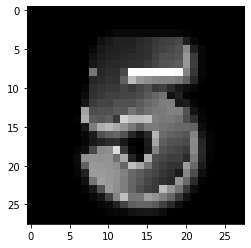

5


In [5]:
#Second Way:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#Another way test:
img = load_img('img1.jpg', color_mode = "grayscale", target_size=(28, 28),interpolation='nearest')
# img.show()
plt.imshow(img, cmap=plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
# img = img / 255.0
img = 255-img
predict = model.predict([img])
print(np.argmax(predict[0]))